In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('online_retail_II.xlsx')

### Explatory Data Analysis

In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Customer ID is essensial for our analysis, so we will drop all of the row that have null Customer ID. Meanwhile, we can ignore Description column since we dont really use it.

In [4]:
df.dropna(subset='Customer ID',inplace=True)

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


It is strange that there is negative values in Quantity column. But lets just assume  negative quantities is when a customer returns or cancels an order. In this case, the negative quantity represents a reduction in the total quantity of items purchased by the customer.

In [6]:
df['TotalPrice'] = df['Quantity']*df['Price']

In [7]:
# Function to return the first day of the month
def get_month(x): return dt.datetime(x.year,x.month,1)

# Function to return year, month, date from datetime format
def get_date_int(df,columns):
    return df[columns].dt.year,df[columns].dt.month,df[columns].dt.day

In [8]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
grouping = df.groupby('Customer ID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [9]:
df[df['Customer ID']==13085]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,2009-12-01
...,...,...,...,...,...,...,...,...,...,...,...
74409,496166,79323W,WHITE CHERRY LIGHTS,8,2010-01-29 11:42:00,6.75,13085.0,United Kingdom,54.00,2010-01-01,2009-12-01
74410,496166,21137,BLACK RECORD COVER FRAME,8,2010-01-29 11:42:00,3.75,13085.0,United Kingdom,30.00,2010-01-01,2009-12-01
74411,496166,22041,"RECORD FRAME 7"" SINGLE SIZE",6,2010-01-29 11:42:00,2.55,13085.0,United Kingdom,15.30,2010-01-01,2009-12-01
74412,496166,40046A,RED DAISY PAPER LAMPSHADE,12,2010-01-29 11:42:00,1.25,13085.0,United Kingdom,15.00,2010-01-01,2009-12-01


In [10]:
invoice_year,invoice_month,_ = get_date_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_date_int(df,'CohortMonth')
years_diff = invoice_year-cohort_year
months_diff = invoice_month-cohort_month
df['CohortIndex'] = years_diff*12+months_diff+1

In [11]:
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data_customer = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data_customer = cohort_data_customer.reset_index()
cohort_counts_customer = cohort_data_customer.pivot(index='CohortMonth',columns='CohortIndex',values='Customer ID')
cohort_counts_customer

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
2010-01-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0,NaN
2010-02-01,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0,NaN,NaN
2010-03-01,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0,NaN,NaN,NaN
2010-04-01,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,269.0,58.0,53.0,55.0,62.0,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,183.0,38.0,37.0,52.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,158.0,39.0,50.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cohort_sizes = cohort_counts_customer.iloc[:,0]
retention = cohort_counts_customer.divide(cohort_sizes,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,37.5,34.3,42.8,39.2,39.0,39.0,35.8,34.0,37.5,43.3,49.6,24.9
2010-01-01,100.0,21.8,30.2,30.5,27.9,29.2,26.6,23.1,28.9,34.0,31.0,9.4,NaN
2010-02-01,100.0,30.0,22.6,30.3,25.6,20.9,21.8,28.4,27.5,29.2,8.8,NaN,NaN
2010-03-01,100.0,21.8,25.9,23.6,22.9,20.0,24.1,29.8,28.9,8.3,NaN,NaN,NaN
2010-04-01,100.0,23.0,19.9,16.2,18.6,23.0,27.1,26.1,7.6,NaN,NaN,NaN,NaN
2010-05-01,100.0,19.3,17.7,19.3,18.9,26.0,22.0,8.7,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,21.6,19.7,20.4,23.0,28.3,7.4,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,20.8,20.2,28.4,30.1,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,24.7,31.6,32.3,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


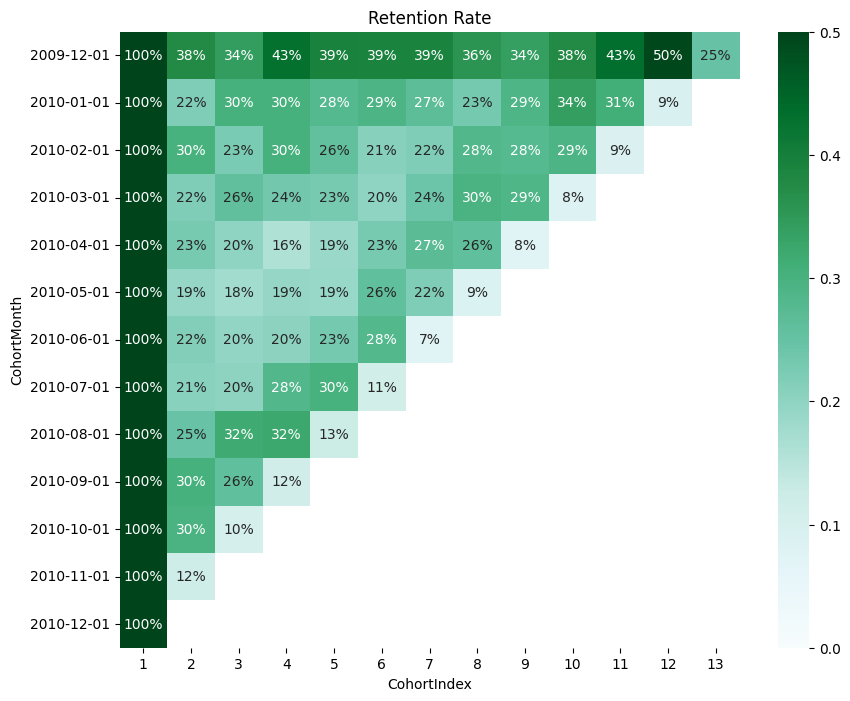

In [13]:
plt.figure(figsize=(10,8))
plt.title('Retention Rate')
sns.heatmap(retention,annot=True,fmt='.0%',cmap='BuGn',vmin=0.0,vmax=0.5,yticklabels=retention.index.strftime('%Y-%m-%d'))
plt.show()

The retention rate is a metric used to measure the percentage of customers who continue to purchase a product or service after their initial purchase. From the available data, it seems that in the month of December 2019, the retention rate was good, indicating that many customers continued to purchase the product after their first purchase. However, in the following months, the retention rate declined, which is a cause for concern as it indicates that fewer customers are returning to make additional purchases.

This decline in retention rate is a problem that needs to be addressed if the business wants to improve. By identifying the reasons behind this decline, the business can take steps to address any issues that may be preventing customers from returning. This could involve improving the quality of the product or service, offering promotions or discounts, enhancing the customer experience, or implementing a loyalty program to incentivize repeat purchases. By improving the retention rate, the business can increase its customer base and revenue over time.

In [14]:
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data_quantity = grouping['Quantity'].mean()
cohort_data_quantity = cohort_data_quantity.reset_index()
cohort_counts_quantity = cohort_data_quantity.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
                        
cohort_counts_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,12.3,21.9,20.1,21.2,12.8,13.6,13.7,13.8,23.8,10.5,15.0,13.3,12.2
2010-01-01,9.0,12.8,9.1,12.5,11.0,11.5,9.9,12.1,10.7,12.3,10.0,5.8,NaN
2010-02-01,9.7,9.1,15.3,12.6,9.7,11.5,11.8,10.1,9.2,9.0,8.5,NaN,NaN
2010-03-01,9.9,13.6,11.5,11.0,10.6,15.0,13.8,12.6,11.0,18.5,NaN,NaN,NaN
2010-04-01,10.4,8.0,9.0,14.6,12.8,10.7,9.8,8.9,7.2,NaN,NaN,NaN,NaN
2010-05-01,11.8,9.6,10.0,12.3,12.6,9.1,7.2,4.9,NaN,NaN,NaN,NaN,NaN
2010-06-01,10.0,8.3,13.0,10.5,10.7,13.8,11.8,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,7.7,6.7,6.7,8.4,6.9,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,8.0,8.2,8.5,7.3,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


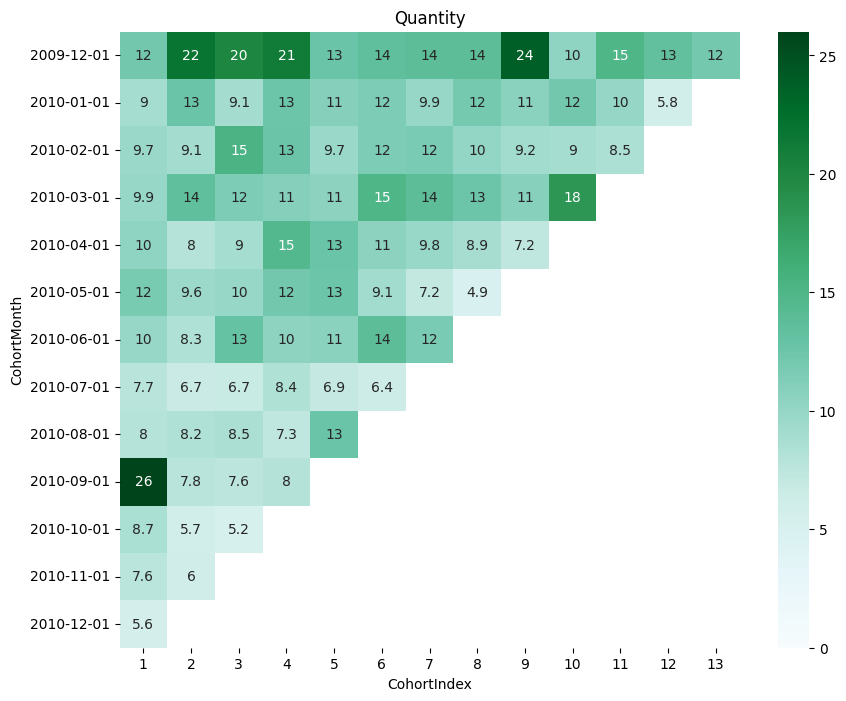

In [15]:
plt.figure(figsize=(10,8))
plt.title('Quantity')
sns.heatmap(cohort_counts_quantity,annot=True,cmap='BuGn',vmin=0.0,vmax=26,yticklabels=retention.index.strftime('%Y-%m-%d'))
plt.show()

The quantity heatmap also highlights a similar issue as the retention heatmap, with a peak in the quantity of products purchased in December 2009, followed by a decline in subsequent months. However, there is an interesting observation in September 2010, where the average quantity purchased jumps to 26. This sudden increase could be attributed to a promotional event or sale that was organized by the retail store during that period. Overall, the quantity heatmap helps to identify patterns and trends in the purchasing behavior of customers, which can be useful for the retail store to plan and optimize their sales and promotions strategies.

In [16]:
grouping = df.groupby(['CohortMonth','CohortIndex'])
cohort_data_monetaryvalue = (grouping['TotalPrice']).mean()
cohort_data_monetaryvalue = cohort_data_monetaryvalue.reset_index()
cohort_counts_monetaryvalue = cohort_data_monetaryvalue.pivot(index='CohortMonth',columns='CohortIndex',values='TotalPrice')
cohort_counts_monetaryvalue.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,20.9,29.7,23.7,24.9,22.3,21.1,21.9,25.2,29.1,24.9,25.1,24.2,27.7
2010-01-01,15.7,20.7,15.5,18.8,18.3,21.6,17.9,17.1,19.7,19.2,19.8,13.8,NaN
2010-02-01,16.3,15.2,22.4,17.5,16.0,18.1,17.8,17.0,16.0,16.7,17.1,NaN,NaN
2010-03-01,13.6,20.8,17.1,16.3,17.0,19.7,20.6,18.1,16.8,20.5,NaN,NaN,NaN
2010-04-01,15.4,15.3,17.5,27.1,18.9,18.6,16.1,15.4,13.0,NaN,NaN,NaN,NaN
2010-05-01,16.5,16.2,17.3,17.1,22.3,14.9,13.0,9.2,NaN,NaN,NaN,NaN,NaN
2010-06-01,10.8,10.9,18.6,16.3,16.1,18.8,20.2,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,13.3,13.5,11.3,14.5,13.1,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,12.5,15.7,16.6,14.6,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


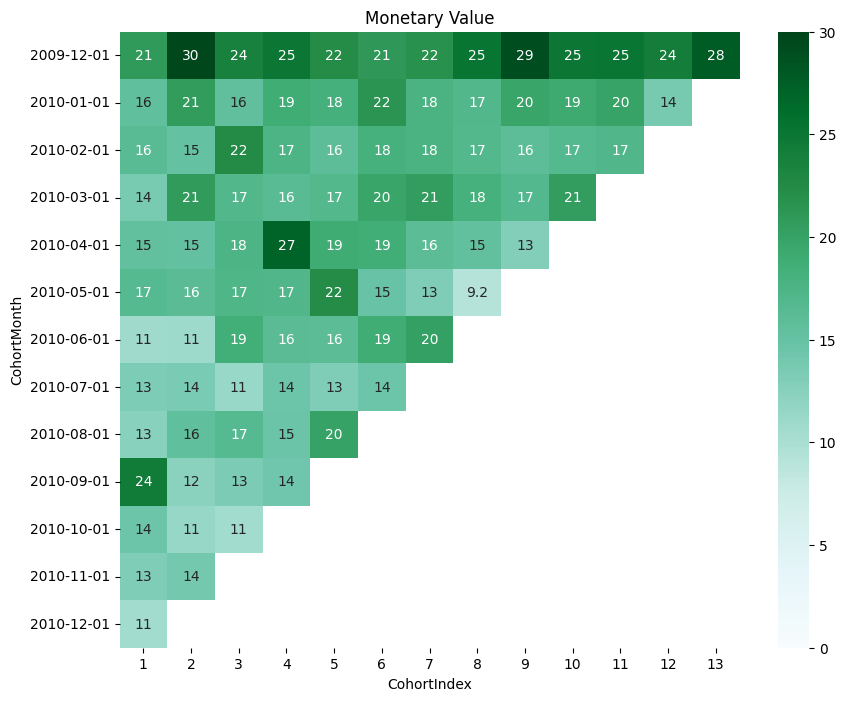

In [17]:
plt.figure(figsize=(10,8))
plt.title('Monetary Value')
sns.heatmap(cohort_counts_monetaryvalue,annot=True,cmap='BuGn',vmin=0.0,vmax=30,yticklabels=retention.index.strftime('%Y-%m-%d'))
plt.show()

The three heatmaps, including the retention rate, quantity, and monetary value, all suggest a decline in the performance of the retail business. These issues need to be addressed promptly to improve the business. Identifying the root cause of the problem, such as changes in customer behavior, market competition, or internal operational issues, is crucial to come up with effective solutions. Once the root cause is identified, the business can take appropriate actions, such as adjusting pricing strategy, improving customer experience, or optimizing inventory management, to revitalize the business and ensure long-term success.

### RFM Analysis

RFM analysis is a marketing technique used to analyze customer behavior based on three key factors: Recency, Frequency, and Monetary Value. Recency refers to the time since a customer's last purchase, Frequency is the number of purchases a customer has made, and Monetary Value is the total amount spent by a customer. By segmenting customers based on these factors, RFM analysis can help identify which customers are most valuable to a business, which customers need to be targeted for retention efforts, and which customers are at risk of being lost.

In [18]:
snapshot_date = max(df['InvoiceDate'])+ dt.timedelta(days=1)
snapshot_date

Timestamp('2010-12-10 20:01:00')

In [19]:
data = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date-x.max()).days,
     'Invoice': 'count',
      'TotalPrice': 'sum'})
data.rename(columns={
    'InvoiceDate':'Recency',
    'Invoice':'Frequency',
    'TotalPrice':'MonetaryValue'
},inplace=True)
data

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,67,46,-64.68
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,107,2646.99
12351.0,11,21,300.93
...,...,...,...
18283.0,18,230,641.77
18284.0,65,29,436.68
18285.0,296,12,427.00


In [20]:
data['R'] = pd.qcut(data['Recency'],q=5,labels=range(5,0,-1)).values
data['F'] = pd.qcut(data['Frequency'],q=5,labels=range(1,6)).values
data['M'] = pd.qcut(data['MonetaryValue'],q=5,labels=range(1,6)).values
data

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,67,46,-64.68,3,3,1
12347.0,3,71,1323.32,5,4,4
12348.0,74,20,222.16,2,2,1
12349.0,43,107,2646.99,3,4,5
12351.0,11,21,300.93,5,2,2
...,...,...,...,...,...,...
18283.0,18,230,641.77,4,5,3
18284.0,65,29,436.68,3,2,2
18285.0,296,12,427.00,1,1,2


In [371]:
data['RFM_Segment'] = data.apply(lambda x :(str(int(x['R']))+str(int(x['F']))+str(int(x['M']))) ,axis=1)
data['RFM_Score'] = data.apply(lambda x :x['R']+x['F']+x['M'] ,axis=1)

In [372]:
data.sort_values(by='RFM_Score')

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
15354.0,234,7,-94.80,1,1,1,111,3
15997.0,253,1,-23.40,1,1,1,111,3
13609.0,229,7,167.35,1,1,1,111,3
17543.0,185,13,120.05,1,1,1,111,3
17546.0,182,1,-648.05,1,1,1,111,3
...,...,...,...,...,...,...,...,...
13081.0,7,1369,30363.67,5,5,5,555,15
17019.0,4,481,2678.89,5,5,5,555,15
13078.0,2,475,16451.55,5,5,5,555,15


In [373]:
data.groupby('RFM_Score').size().sort_values(ascending=False)

RFM_Score
7     393
5     384
8     375
11    373
9     366
10    348
13    340
6     326
15    321
12    303
14    299
3     283
4     272
dtype: int64

In [374]:
data.groupby('RFM_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
})

Recency   Frequency MonetaryValue      
                   mean        mean          mean count
RFM_Segment                                            
111          274.681979    5.720848    -61.134276   283
112          282.384615    9.030769    310.523385    65
113          259.166667    7.083333    644.297500    12
114          231.600000    5.000000   1197.526000     5
115          287.000000   11.000000   5832.770000     2
...                 ...         ...           ...   ...
551            1.000000  181.000000   -486.700000     1
552            6.500000  133.000000    440.700000     2
553            8.320000  170.480000    728.182800    25
554            6.328358  219.776119   1478.607463    67
555            6.277259  432.389408  11287.648361   321

[119 rows x 4 columns]

In [375]:
def rfm_group(df):
    if(df['RFM_Score']>11):
        return 'Gold'
    elif(df['RFM_Score']>7):
        return 'Silver'
    else:
        return 'Bronze'
data['Grouping_Segment'] = data.apply(rfm_group,axis=1)

In [376]:
data.groupby('Grouping_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
})

Recency   Frequency MonetaryValue      
                        mean        mean          mean count
Grouping_Segment                                            
Bronze            169.328106   17.790109    222.914054  1658
Gold               20.419636  238.146477   5095.512604  1263
Silver             64.329001   59.684679   1055.393060  1462

### Transform the Data

We see that there is negative value in MonetaryValue column. I want to handle this so I can transform the skewed data better. I replace the negative values with 0.

In [21]:
data.loc[data['MonetaryValue'] < 0, 'MonetaryValue'] = 0

In [22]:
plt.style.use('fivethirtyeight')

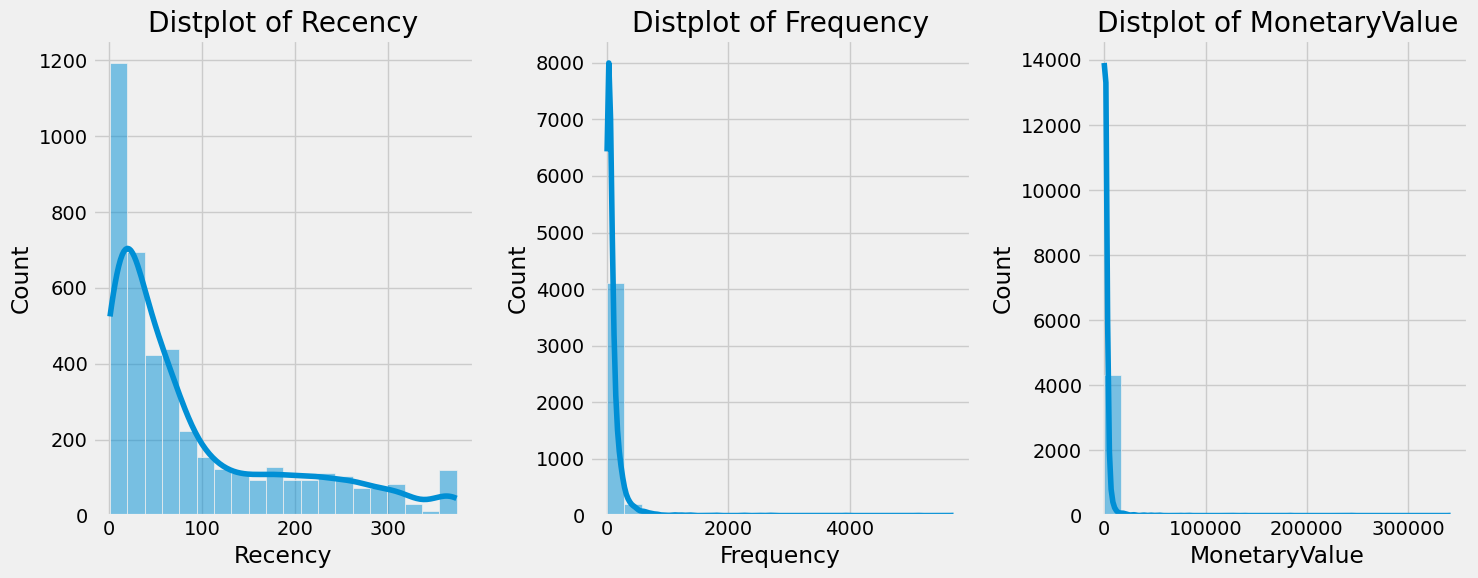

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i, x in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    sns.histplot(data[x], bins=20, ax=axs[i],kde=True)
    axs[i].set_title('Distplot of {}'.format(x))
    
plt.tight_layout()
plt.show()


In [24]:
from scipy.stats import boxcox

<Axes: xlabel='Recency', ylabel='Count'>

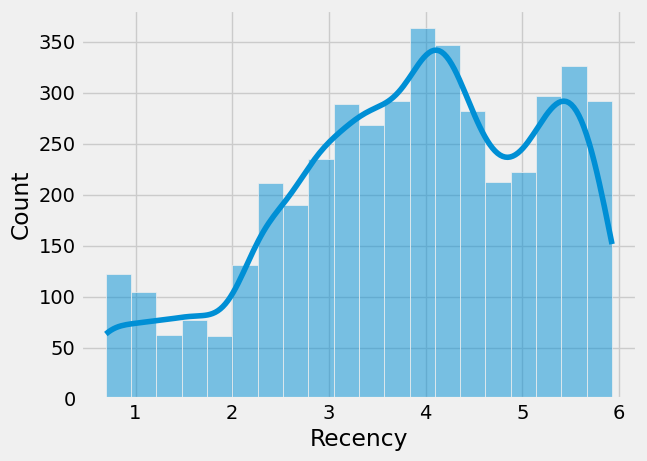

In [25]:
d = np.log1p(data['Recency'])
sns.histplot(d, bins=20,kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

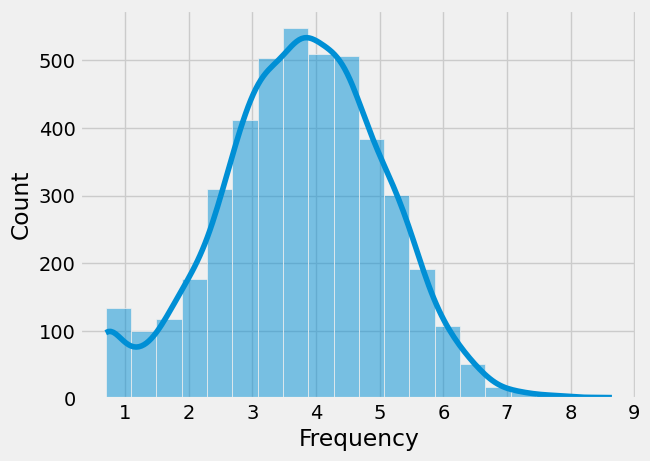

In [26]:
d = np.log1p(data['Frequency'])
sns.histplot(d, bins=20,kde=True)

<Axes: xlabel='MonetaryValue', ylabel='Count'>

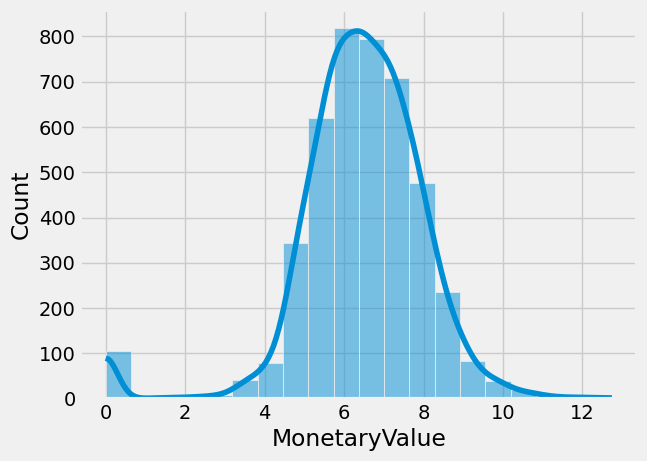

In [27]:
d = np.log1p(data['MonetaryValue'])
sns.histplot(d, bins=20,kde=True)

In [28]:
data_transformed= data.copy()
data_transformed['Recency'] = np.log1p(data['Recency'])
data_transformed['Frequency'] = np.log1p(data['Frequency'])
data_transformed['MonetaryValue'] = np.log1p(data['MonetaryValue'])

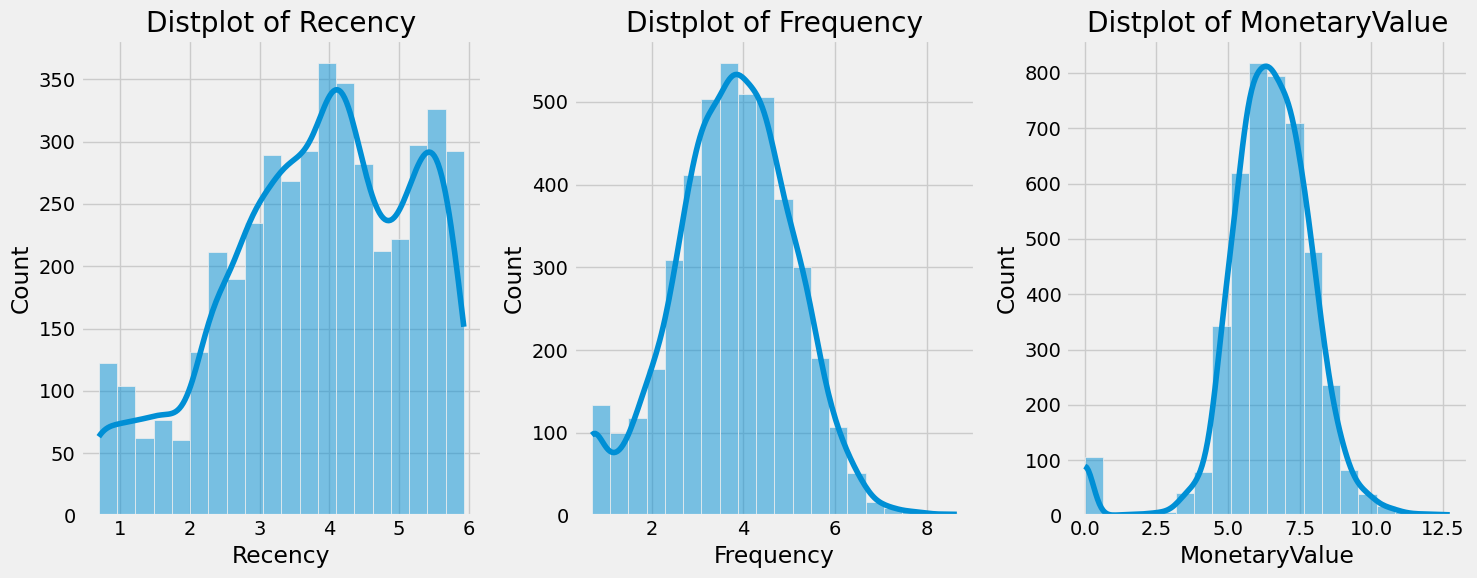

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i, x in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    sns.histplot(data_transformed[x], bins=20, ax=axs[i],kde=True)
    axs[i].set_title('Distplot of {}'.format(x))
    
plt.tight_layout()
plt.show()


In [30]:
data_transformed.describe()

,Recency,Frequency,MonetaryValue
count,4383.000000,4383.000000,4383.000000
mean,3.831210,3.761936,6.432931
std,1.334367,1.298053,1.614037
min,0.693147,0.693147,0.000000
25%,2.890372,2.944439,5.656900
50%,3.970292,3.806662,6.487593
75%,4.934474,4.644391,7.406522
max,5.926926,8.650149,12.741916


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_transformed[['Recency','Frequency','MonetaryValue']])

In [33]:
data_scaled = pd.DataFrame(data_scaled,columns=['Recency','Frequency','MonetaryValue'],index=data.index)

In [34]:
data_scaled.describe()

,Recency,Frequency,MonetaryValue
count,4.383000e+03,4.383000e+03,4.383000e+03
mean,-5.430797e-16,5.390268e-17,-4.279792e-16
std,1.000114e+00,1.000114e+00,1.000114e+00
min,-2.351992e+00,-2.364417e+00,-3.986071e+00
25%,-7.051625e-01,-6.298588e-01,-4.808561e-01
50%,1.042426e-01,3.446048e-02,3.387006e-02
75%,8.269014e-01,6.799070e-01,6.032707e-01
max,1.570749e+00,3.766233e+00,3.909269e+00


### Clustering

In [35]:
from sklearn.cluster import KMeans

In [36]:
inertias=[]
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=1,n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

<Axes: title={'center': 'Inertia Plot'}>

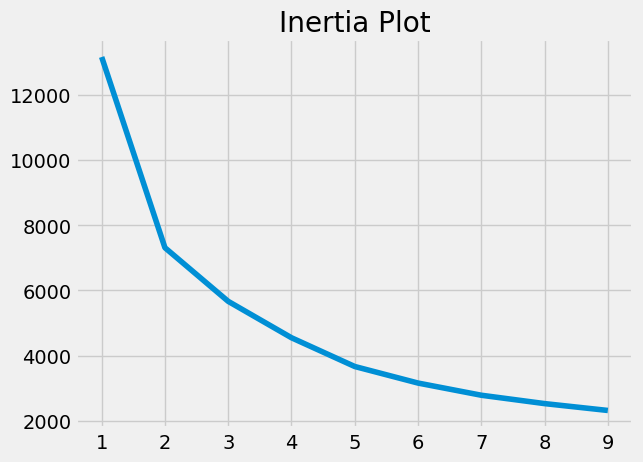

In [37]:
plt.title('Inertia Plot')
sns.lineplot(x=k_range,y=inertias)

#### 2 clusters

In [38]:
kmeans = KMeans(n_clusters=2,random_state=1,n_init=10)
labels = kmeans.fit_predict(data_scaled)
labels

array([1, 0, 1, ..., 1, 0, 0])

In [39]:
data_k2 = data.assign(Clusters=labels)
data_k2.groupby('Clusters').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
})

Recency   Frequency MonetaryValue      
                mean        mean          mean count
Clusters                                            
0          33.425875  168.854512   3484.271667  2172
1         148.341927   22.967888    395.759359  2211

#### 3 clusters

In [40]:
kmeans = KMeans(n_clusters=3,random_state=1,n_init=10)
labels = kmeans.fit_predict(data_scaled)
labels

array([2, 0, 1, ..., 2, 1, 0])

In [41]:
data_k3 = data.assign(Clusters=labels)
data_k3.groupby('Clusters').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
})

Recency   Frequency MonetaryValue      
                mean        mean          mean count
Clusters                                            
0          16.643564  227.631379   4863.087363  1313
1          92.859054   51.755853    902.565029  2093
2         188.718526   10.572160    172.527831   977

#### 4 clusters

In [42]:
kmeans = KMeans(n_clusters=4,random_state=1,n_init=10)
labels = kmeans.fit_predict(data_scaled)
labels

array([0, 1, 3, ..., 3, 2, 1])

In [43]:
data_k4 = data.assign(Clusters=labels)
data_k4.groupby('Clusters').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
})

Recency   Frequency MonetaryValue      
                mean        mean          mean count
Clusters                                            
0         209.756303    9.159664      1.380336   119
1          11.190041  261.060976   5781.719510   984
2          66.265283   75.378015   1292.179598  1783
3         164.637275   16.807615    300.286922  1497

We can segment the customer into 2, 3 , or 4 clusters. But to get more specific customer group, I decided to segment it into 4 clusters.

In [51]:
data_scaled = data_scaled.assign(Clusters=labels)
data_scaled.reset_index()

,Customer ID,Recency,Frequency,MonetaryValue,Clusters
0,12346.0,0.291031,0.067965,-3.986071,0
1,12347.0,-1.832475,0.396585,0.468273,1
2,12348.0,0.364468,-0.552747,-0.635152,3
3,12349.0,-0.035242,0.708985,0.897619,2
4,12351.0,-1.009060,-0.516905,-0.447833,2
...,...,...,...,...,...
4378,18283.0,-0.664639,1.294765,0.020358,1
4379,18284.0,0.268656,-0.277939,-0.217767,2
4380,18285.0,1.395969,-0.922245,-0.231625,3
4381,18286.0,0.671689,0.385809,0.401708,2


In [52]:
data_melt = pd.melt(data_scaled.reset_index(), 
                        id_vars=['Customer ID', 'Clusters'], 
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Attribute', value_name='Value') 
data_melt

,Customer ID,Clusters,Attribute,Value
0,12346.0,0,Recency,0.291031
1,12347.0,1,Recency,-1.832475
2,12348.0,3,Recency,0.364468
3,12349.0,2,Recency,-0.035242
4,12351.0,2,Recency,-1.009060
...,...,...,...,...
13144,18283.0,1,MonetaryValue,0.020358
13145,18284.0,2,MonetaryValue,-0.217767
13146,18285.0,3,MonetaryValue,-0.231625
13147,18286.0,2,MonetaryValue,0.401708


<Axes: title={'center': 'Snake Plot'}, xlabel='Attribute', ylabel='Value'>

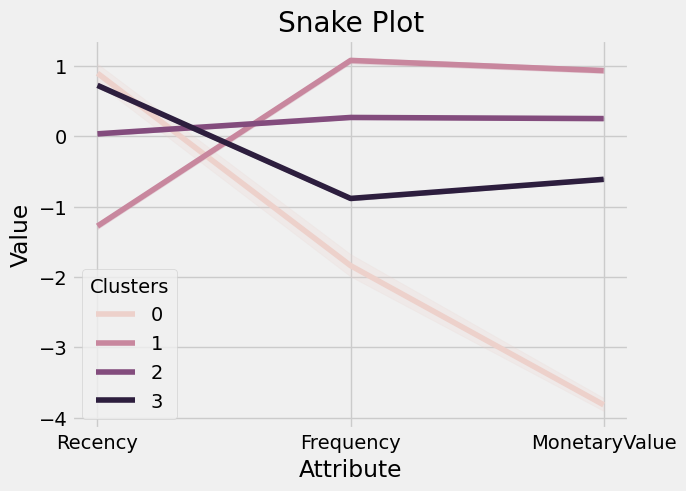

In [53]:
plt.title('Snake Plot')
sns.lineplot(x='Attribute',y='Value',hue='Clusters',data=data_melt)

In [54]:
cluster_avg = data_k4.groupby(['Clusters'])['Recency', 'Frequency', 'MonetaryValue'].mean()
population_avg = data[['Recency', 'Frequency', 'MonetaryValue']].mean()

C:\Users\Damian Marvel\AppData\Local\Temp\ipykernel_6608\3667833901.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_avg = data_k4.groupby(['Clusters'])['Recency', 'Frequency', 'MonetaryValue'].mean()


In [55]:
relative_imp =cluster_avg/population_avg-1
relative_imp

,Recency,Frequency,MonetaryValue
Clusters,,,
0,1.295048,-0.903848,-0.999283
1,-0.877564,1.740448,2.001503
2,-0.274959,-0.208731,-0.329182
3,0.801378,-0.823565,-0.844110


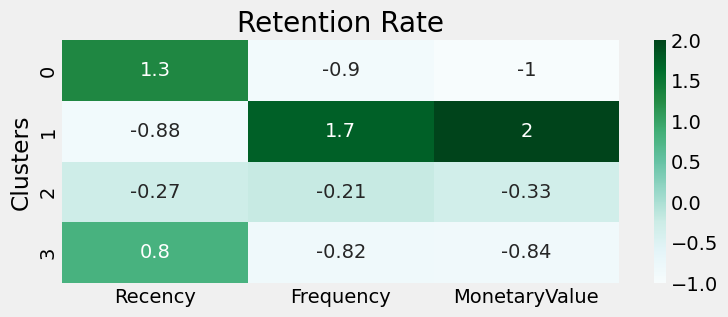

In [49]:
plt.figure(figsize=(8,3))
plt.title('Retention Rate')
sns.heatmap(relative_imp,annot=True,cmap='BuGn',vmin=-1,vmax=2)
plt.show()

Looking a